### The goal of this notebook is to identify which Bedmap1 points are covered by other datasets

In [2]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

import importlib
import numpy as np
import os
import pathlib
import shapefile as shp  # Requires the pyshp package; I ran `pip install pyshp`


In [3]:
import detangle_bedmap_utils
importlib.reload(detangle_bedmap_utils)
from detangle_bedmap_utils import (expand_range, find_closest_bedmap,
                                   load_bedmap_ll, load_bedmap_xy, 
                                   subsample_tracks_uniform, 
                                  )

In [4]:
gl_filepath = "/Users/lindzey/Data/Quantarctica3/Glaciology/ASAID/ASAID_GroundingLine_Simplified.shp"

# If I do it this way, I can plot as points (but not lines!). This is easier than having to iterate through each segment.
sf = shp.Reader(gl_filepath)
gl_xx = []
gl_yy = []
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    gl_xx.extend(x)
    gl_yy.extend(y)

In [5]:
bm1_path = "/Users/lindzey/RadarData/ANTARCTIC/BEDMAP/BEDMAP1/BEDMAP1_1966-2000_AIR_BM1.csv"
bm1_lon, bm1_lat = load_bedmap_ll(bm1_path)
bm1_xx, bm1_yy = load_bedmap_xy(bm1_path)

## INGV

It looks like part of the 1997_Talos-Dome survey is in BM1, but not all.
(And the 1997_ITASE survey datapoints seem to have some exact overlap with part of 1997_Talos-Dome)

However, zooming in more, it looks like the part that is in BM1 is a traverse route, and doesn't line up exactly with the positioning provided in the BM3 dataset. So, I'm not going to try to segment out those points yet.


In [6]:
survey = "INGV_1997_Talos-Dome_AIR_BM3"

In [8]:
survey_path = "/Users/lindzey/RadarData/ANTARCTIC/BEDMAP/BEDMAP3/{}.csv".format(survey)
ingv_xx, ingv_yy = load_bedmap_xy(survey_path)
ingv_bm1_idxs = find_closest_bedmap(ingv_xx, ingv_yy, bm1_xx, bm1_yy, decimation=50)    

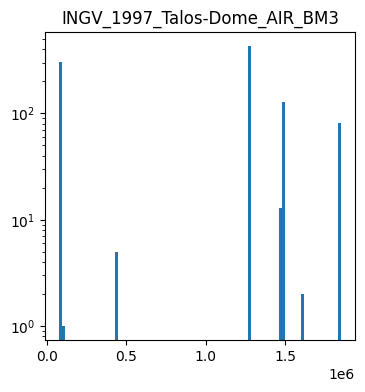

In [10]:
fig = plt.figure(figsize=(4,4))
ax = fig.subplots(1,1)

ax.hist(ingv_bm1_idxs, bins=100);
ax.set_title(survey)
ax.set_yscale('log')
    
ax.vlines([], 0, 100, linestyle='dotted', colors='black')
    